# Time Series Analysis

In [1]:
import pandas as pd
import numpy as np 
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
start_date = '2012-07-23'
end_date = "2020-01-24"

stock = yf.Ticker('AAPL') #
stock_name = stock.info['shortName']
stock_data = yf.download(stock.ticker,interval='1d', start=start_date, end=end_date)
adj_close = stock_data["Adj Close"]
# adj_close = adj_close.resample('D').mean()
# adj_close = pd.DataFrame(adj_close, index=pd.DatetimeIndex(adj_close.index, freq='D'))
# adj_close.ffill(inplace=True)

[*********************100%%**********************]  1 of 1 completed


## Augmented Dickey Fuller test for Stationarity

### Price

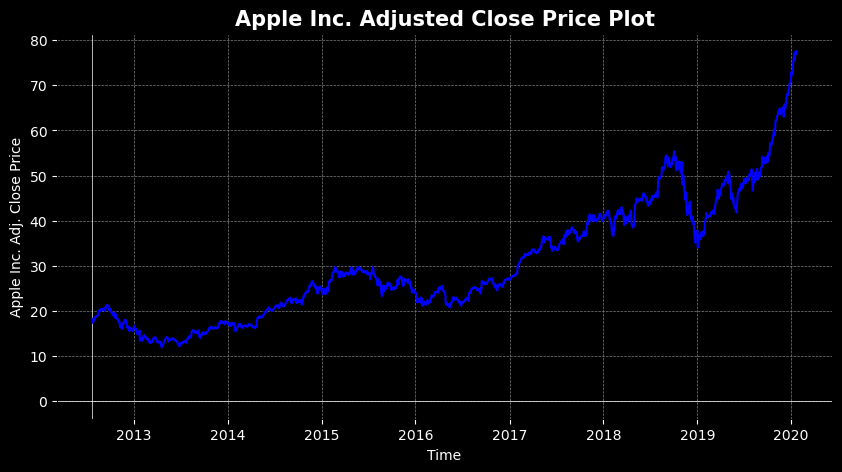

Dickey Fuller Test Result:
ADF Statistic           2.185886
p-value                 0.998871
Lags Used               9.000000
Observations Used    1878.000000
dtype: float64 

Dickey Fuller Critical Values:
    1%: -3.4338
    5%: -2.8631
    10%: -2.5676

The time series is nonstationary.


In [3]:
fig, ax = plt.subplots(figsize=(10, 5),facecolor='black')
ax.set_facecolor('black')
ax.axhline(0, color='white', linewidth=0.5)
ax.axvline(adj_close.index[0], color='white', linewidth=0.5)
ax.plot(adj_close, color='blue')
ax.set_xlabel('Time', color='white')
ax.set_ylabel(f'{stock_name} Adj. Close Price', color='white')
ax.set_title(f'{stock_name} Adjusted Close Price Plot', color='white', fontsize=15, fontweight='bold')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
plt.show()

result = adfuller(adj_close)
output = pd.Series(result[0:4],
                    index=["ADF Statistic", "p-value", "Lags Used", "Observations Used"],)
print(f"Dickey Fuller Test Result:\n{output} \n\nDickey Fuller Critical Values:")

critical_values = result[4]
for key, value in critical_values.items():
    print(f"    {key}: {value:.4f}")

if result[1] < 0.05:
    print("\nThe time series is stationary.")
else:
    print("\nThe time series is nonstationary.")

### Log return

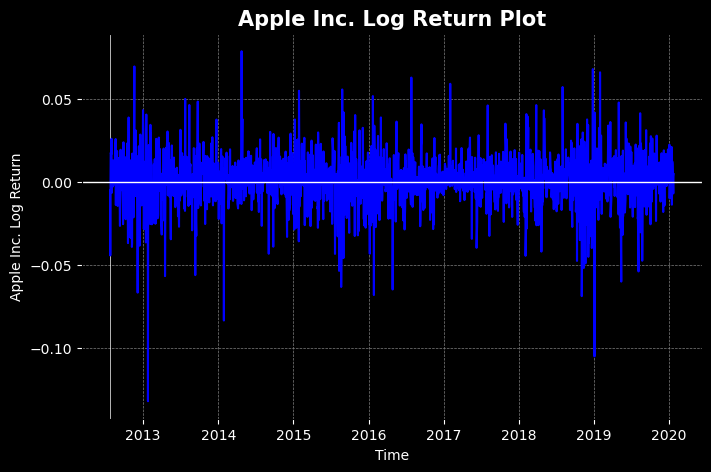

Dickey Fuller Test Result:
ADF Statistic       -1.511808e+01
p-value              7.528489e-28
Lags Used            7.000000e+00
Observations Used    1.879000e+03
dtype: float64 

Dickey Fuller Critical Values:
    1%: -3.4338
    5%: -2.8631
    10%: -2.5676

The time series is stationary.


In [4]:
logreturn = np.log(adj_close).diff().dropna()

fig, ax = plt.subplots(figsize=(8, 5),facecolor='black')
ax.set_facecolor('black')
ax.axvline(logreturn.index[0], color='white', linewidth=0.5)
ax.plot(logreturn, color='blue')
ax.set_xlabel('Time', color='white')
ax.set_ylabel(f'{stock_name} Log Return', color='white')
ax.set_title(f'{stock_name} Log Return Plot', color='white', fontsize=15, fontweight='bold')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
ax.axhline(0, color='white', linewidth=1)
plt.show()

result = adfuller(logreturn)
output = pd.Series(result[0:4],
                    index=["ADF Statistic", "p-value", "Lags Used", "Observations Used"],)
print(f"Dickey Fuller Test Result:\n{output} \n\nDickey Fuller Critical Values:")

critical_values = result[4]
for key, value in critical_values.items():
    print(f"    {key}: {value:.4f}")

if result[1] < 0.05:
    print("\nThe time series is stationary.")
else:
    print("\nThe time series is nonstationary.")

### Volume

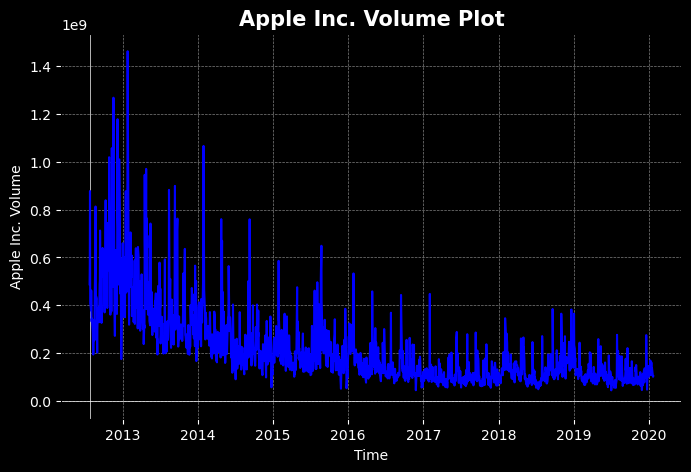

Dickey Fuller Test Result:
ADF Statistic          -2.071100
p-value                 0.256293
Lags Used              26.000000
Observations Used    1861.000000
dtype: float64 

Dickey Fuller Critical Values:
    1%: -3.4339
    5%: -2.8631
    10%: -2.5676

The time series is nonstationary.


In [5]:
volume = stock_data['Volume']

fig, ax = plt.subplots(figsize=(8, 5),facecolor='black')
ax.set_facecolor('black')
ax.axvline(volume.index[0], color='white', linewidth=0.5)
ax.axhline(0, color='white', linewidth=0.5)
ax.plot(volume, color='blue')
ax.set_xlabel('Time', color='white')
ax.set_ylabel(f'{stock_name} Volume', color='white')
ax.set_title(f'{stock_name} Volume Plot', color='white', fontsize=15, fontweight='bold')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
plt.show()

result = adfuller(volume)
output = pd.Series(result[0:4],
                    index=["ADF Statistic", "p-value", "Lags Used", "Observations Used"],)
print(f"Dickey Fuller Test Result:\n{output} \n\nDickey Fuller Critical Values:")

critical_values = result[4]
for key, value in critical_values.items():
    print(f"    {key}: {value:.4f}")

if result[1] < 0.05:
    print("\nThe time series is stationary.")
else:
    print("\nThe time series is nonstationary.")

### Log volume

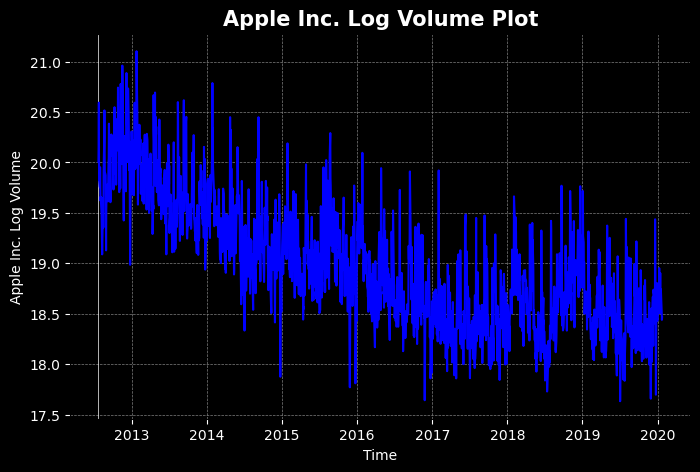

Dickey Fuller Test Result:
ADF Statistic          -2.193095
p-value                 0.208761
Lags Used              25.000000
Observations Used    1862.000000
dtype: float64 

Dickey Fuller Critical Values:
    1%: -3.4339
    5%: -2.8631
    10%: -2.5676

The time series is nonstationary.


In [6]:
logvolume = np.log(stock_data['Volume'])

fig, ax = plt.subplots(figsize=(8, 5),facecolor='black')
ax.set_facecolor('black')
ax.axvline(logvolume.index[0], color='white', linewidth=0.5)
ax.plot(logvolume, color='blue')
ax.set_xlabel('Time', color='white')
ax.set_ylabel(f'{stock_name} Log Volume', color='white')
ax.set_title(f'{stock_name} Log Volume Plot', color='white', fontsize=15, fontweight='bold')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
plt.show()

result = adfuller(logvolume)
output = pd.Series(result[0:4],
                    index=["ADF Statistic", "p-value", "Lags Used", "Observations Used"],)
print(f"Dickey Fuller Test Result:\n{output} \n\nDickey Fuller Critical Values:")

critical_values = result[4]
for key, value in critical_values.items():
    print(f"    {key}: {value:.4f}")

if result[1] < 0.05:
    print("\nThe time series is stationary.")
else:
    print("\nThe time series is nonstationary.")

### Diff volume

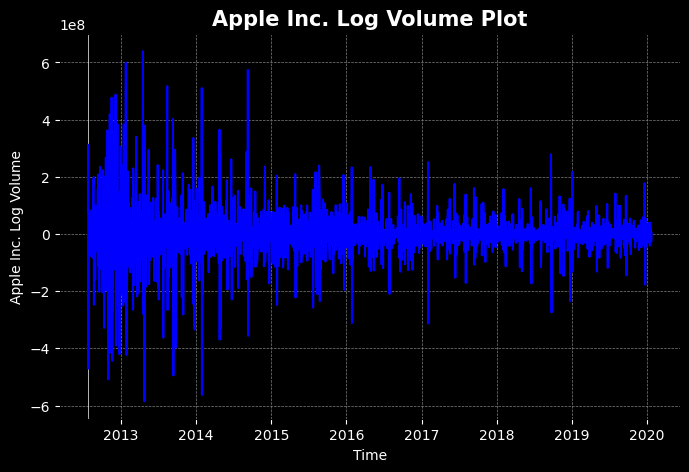

Dickey Fuller Test Result:
ADF Statistic       -1.587743e+01
p-value              8.837433e-29
Lags Used            2.400000e+01
Observations Used    1.862000e+03
dtype: float64 

Dickey Fuller Critical Values:
    1%: -3.4339
    5%: -2.8631
    10%: -2.5676

The time series is stationary.


In [7]:
diffvolume = stock_data['Volume'].diff().dropna()

fig, ax = plt.subplots(figsize=(8, 5),facecolor='black')
ax.set_facecolor('black')
ax.axvline(diffvolume.index[0], color='white', linewidth=0.5)
ax.plot(diffvolume, color='blue')
ax.set_xlabel('Time', color='white')
ax.set_ylabel(f'{stock_name} Log Volume', color='white')
ax.set_title(f'{stock_name} Log Volume Plot', color='white', fontsize=15, fontweight='bold')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
plt.show()

result = adfuller(diffvolume)
output = pd.Series(result[0:4],
                    index=["ADF Statistic", "p-value", "Lags Used", "Observations Used"],)
print(f"Dickey Fuller Test Result:\n{output} \n\nDickey Fuller Critical Values:")

critical_values = result[4]
for key, value in critical_values.items():
    print(f"    {key}: {value:.4f}")

if result[1] < 0.05:
    print("\nThe time series is stationary.")
else:
    print("\nThe time series is nonstationary.")

### RSI

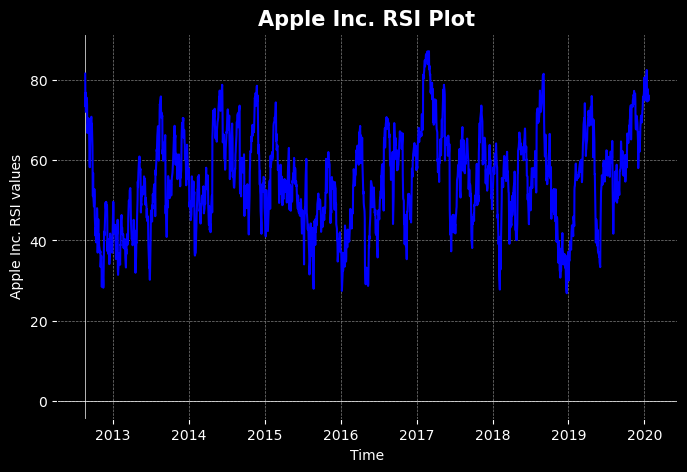

Dickey Fuller Test Result:
ADF Statistic       -5.778365e+00
p-value              5.195214e-07
Lags Used            9.000000e+00
Observations Used    1.858000e+03
dtype: float64 

Dickey Fuller Critical Values:
    1%: -3.4339
    5%: -2.8631
    10%: -2.5676

The time series is stationary.


In [8]:
rsi_dayperiod = 20

rsi = ta.rsi(close=adj_close, length=rsi_dayperiod).dropna()

fig, ax = plt.subplots(figsize=(8, 5),facecolor='black')
ax.set_facecolor('black')
ax.axvline(rsi.index[0], color='white', linewidth=0.5)
ax.axhline(0, color='white', linewidth=0.5)
ax.plot(rsi, color='blue')
ax.set_xlabel('Time', color='white')
ax.set_ylabel(f'{stock_name} RSI values', color='white')
ax.set_title(f'{stock_name} RSI Plot', color='white', fontsize=15, fontweight='bold')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
plt.show()

result = adfuller(rsi)
output = pd.Series(result[0:4],
                    index=["ADF Statistic", "p-value", "Lags Used", "Observations Used"],)
print(f"Dickey Fuller Test Result:\n{output} \n\nDickey Fuller Critical Values:")

critical_values = result[4]
for key, value in critical_values.items():
    print(f"    {key}: {value:.4f}")

if result[1] < 0.05:
    print("\nThe time series is stationary.")
else:
    print("\nThe time series is nonstationary.")

### Volatility Indicators

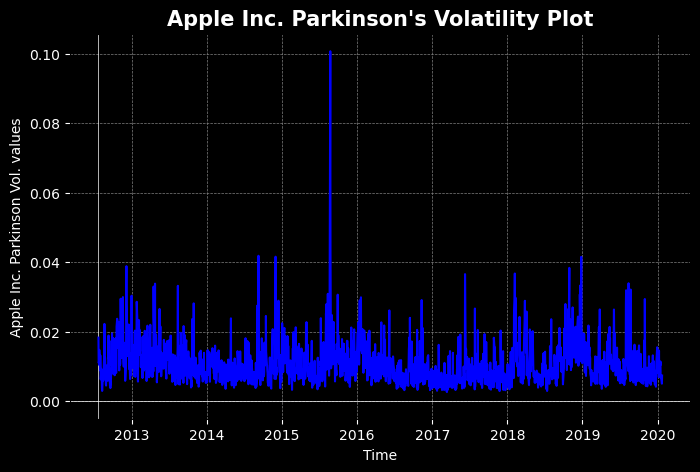

Dickey Fuller Test Result:
ADF Statistic       -6.431352e+00
p-value              1.694316e-08
Lags Used            1.500000e+01
Observations Used    1.872000e+03
dtype: float64 

Dickey Fuller Critical Values:
    1%: -3.4338
    5%: -2.8631
    10%: -2.5676

The time series is stationary.


In [9]:
# atr_dayperiod = 15

# atr = ta.atr(high=stock_data['High'],
#                  low=stock_data['Low'],
#                  close=adj_close,
#                  length=atr_dayperiod).dropna()

# Calculate Rogers-Satchell Volatility
# rog_sat_vol = np.sqrt(np.log(stock_data['High'] / stock_data['Open'])**2 + np.log(stock_data['Low'] / stock_data['Open'])**2 + np.log(stock_data['Close'] / stock_data['Open'])**2)

# Calculate Parkinson's Volatility
park_vol = np.sqrt(1 / (4 * np.log(2)) * (np.log(stock_data['High']) - np.log(stock_data['Low']))**2)

fig, ax = plt.subplots(figsize=(8, 5),facecolor='black')
ax.set_facecolor('black')
ax.axvline(park_vol.index[0], color='white', linewidth=0.5)
ax.axhline(0, color='white', linewidth=0.5)
ax.plot(park_vol, color='blue')
ax.set_xlabel('Time', color='white')
ax.set_ylabel(f'{stock_name} Parkinson Vol. values', color='white')
ax.set_title(f'{stock_name} Parkinson\'s Volatility Plot', color='white', fontsize=15, fontweight='bold')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
plt.show()

result = adfuller(park_vol)
output = pd.Series(result[0:4],
                    index=["ADF Statistic", "p-value", "Lags Used", "Observations Used"],)
print(f"Dickey Fuller Test Result:\n{output} \n\nDickey Fuller Critical Values:")

critical_values = result[4]
for key, value in critical_values.items():
    print(f"    {key}: {value:.4f}")

if result[1] < 0.05:
    print("\nThe time series is stationary.")
else:
    print("\nThe time series is nonstationary.")

## Differencing

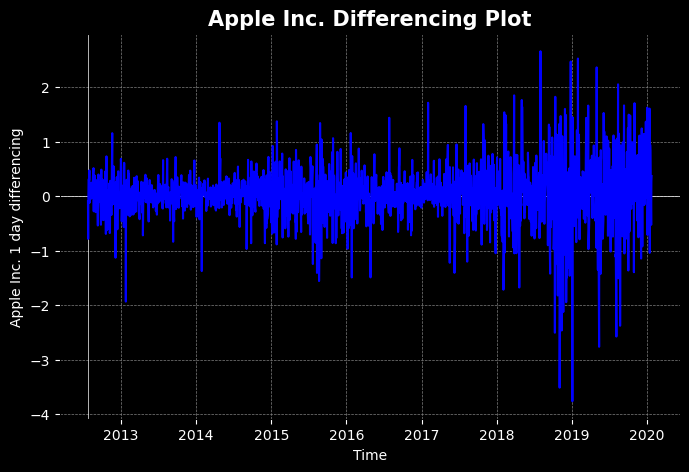

Dickey Fuller Test Result:
ADF Statistic       -1.275879e+01
p-value              8.228918e-24
Lags Used            8.000000e+00
Observations Used    1.878000e+03
dtype: float64 

Dickey Fuller Critical Values:
    1%: -3.4338
    5%: -2.8631
    10%: -2.5676

The time series is stationary.


In [10]:
# Apply first-order differencing
adj_close_diff = adj_close.diff()

# Drop the first row (since it will be NaN due to the differencing)
adj_close_diff = adj_close_diff.dropna()

fig, ax = plt.subplots(figsize=(8, 5),facecolor='black')
ax.set_facecolor('black')
ax.axvline(adj_close_diff.index[0], color='white', linewidth=0.5)
ax.axhline(0, color='white', linewidth=0.5)
ax.plot(adj_close_diff, color='blue')
ax.set_xlabel('Time', color='white')
ax.set_ylabel(f'{stock_name} 1 day differencing', color='white')
ax.set_title(f'{stock_name} Differencing Plot', color='white', fontsize=15, fontweight='bold')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
plt.show()

result = adfuller(adj_close_diff) # try it for different variables like ta.rsi(adj_close, length=14).dropna()
output = pd.Series(result[0:4],
                    index=["ADF Statistic", "p-value", "Lags Used", "Observations Used"],)
print(f"Dickey Fuller Test Result:\n{output} \n\nDickey Fuller Critical Values:")

critical_values = result[4]
for key, value in critical_values.items():
    print(f"    {key}: {value:.4f}")

if result[1] < 0.05:
    print("\nThe time series is stationary.")
else:
    print("\nThe time series is nonstationary.")

## Autocorrelation Function (ACF)

Autocorrelation Function (ACF) measures the linear relationship between a time series and its own lagged values k. You can then use this information to determine the appropriate orders of the moving average (MA) model.

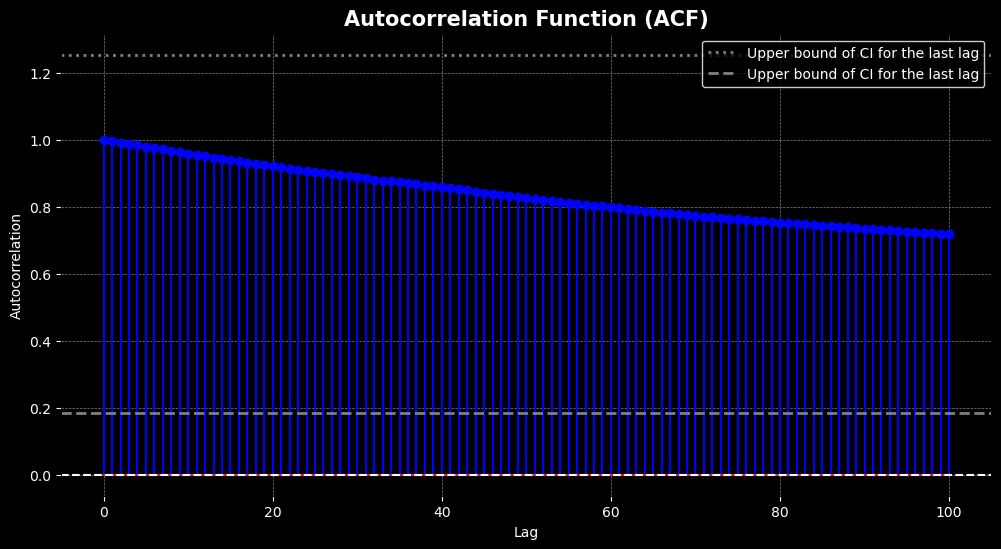

In [11]:
from statsmodels.tsa.stattools import acf

# Calculate the ACF
acf_values, conf_int = acf(adj_close, nlags=100, alpha=0.05)

# Plot the ACF
fig, ax = plt.subplots(figsize=(12, 6),facecolor='black')
ax.set_facecolor('black')
ax.stem(np.arange(len(acf_values)), acf_values, linefmt ='blue')
ax.axhline(y=0, color='white', linestyle='--')
ax.axhline(y=conf_int[-1, 1], color='grey', linestyle=':', linewidth = 2, label = 'Upper bound of CI for the last lag')
ax.axhline(y=conf_int[-1, 0], color='grey', linestyle='--', linewidth = 2, label = 'Upper bound of CI for the last lag')
ax.set_title('Autocorrelation Function (ACF)', color='white', fontsize=15, fontweight='bold')
ax.set_xlabel('Lag', color='white')
ax.set_ylabel('Autocorrelation', color='white')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')
ax.tick_params(axis='both', colors='white')
plt.show()

## Partial Autocorrelation Function (PACF)

PACF isolates the correlation at each individual lag, controlling for the effects of the intermediate lags. The number of significant lags in the PACF plot can indicate the order of the autoregressive (AR) component in a time series model.

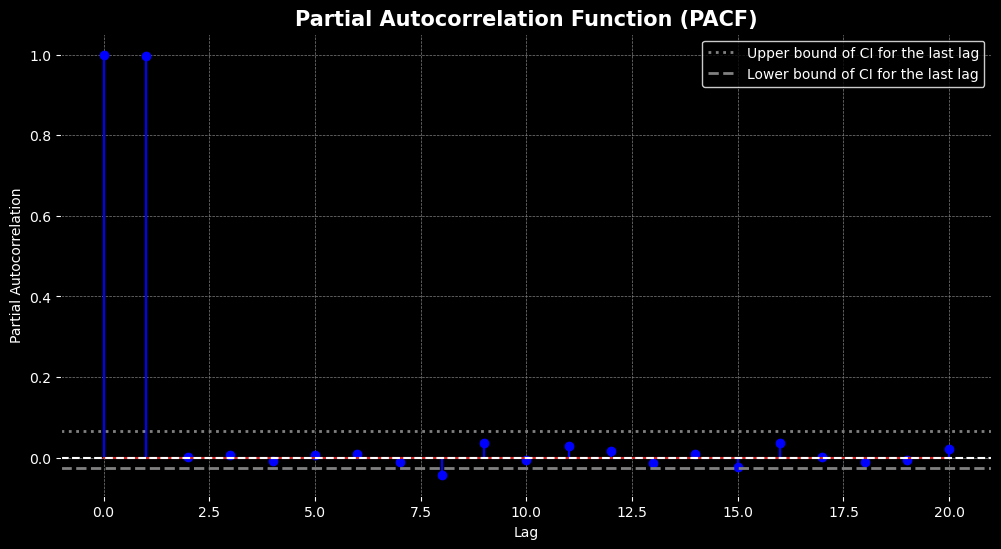

In [12]:
from statsmodels.tsa.stattools import pacf

# Calculate the PACF
pacf_values, pacf_conf_int = pacf(adj_close, nlags=20, alpha=0.05)

# Plot the PACF
fig, ax = plt.subplots(figsize=(12, 6),facecolor='black')
ax.set_facecolor('black')
ax.stem(np.arange(len(pacf_values)), pacf_values, linefmt ='blue')
ax.axhline(y=0, color='white', linestyle='--')
ax.axhline(y=pacf_conf_int[-1, 1], color='grey', linestyle=':', linewidth = 2, label = 'Upper bound of CI for the last lag')
ax.axhline(y=pacf_conf_int[-1, 0], color='grey', linestyle='--', linewidth = 2, label = 'Lower bound of CI for the last lag')
ax.set_title('Partial Autocorrelation Function (PACF)', color='white', fontsize=15, fontweight='bold')
ax.set_xlabel('Lag', color='white')
ax.set_ylabel('Partial Autocorrelation', color='white')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')
ax.tick_params(axis='both', colors='white')
plt.show()

## Times Series Decomposition

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose 

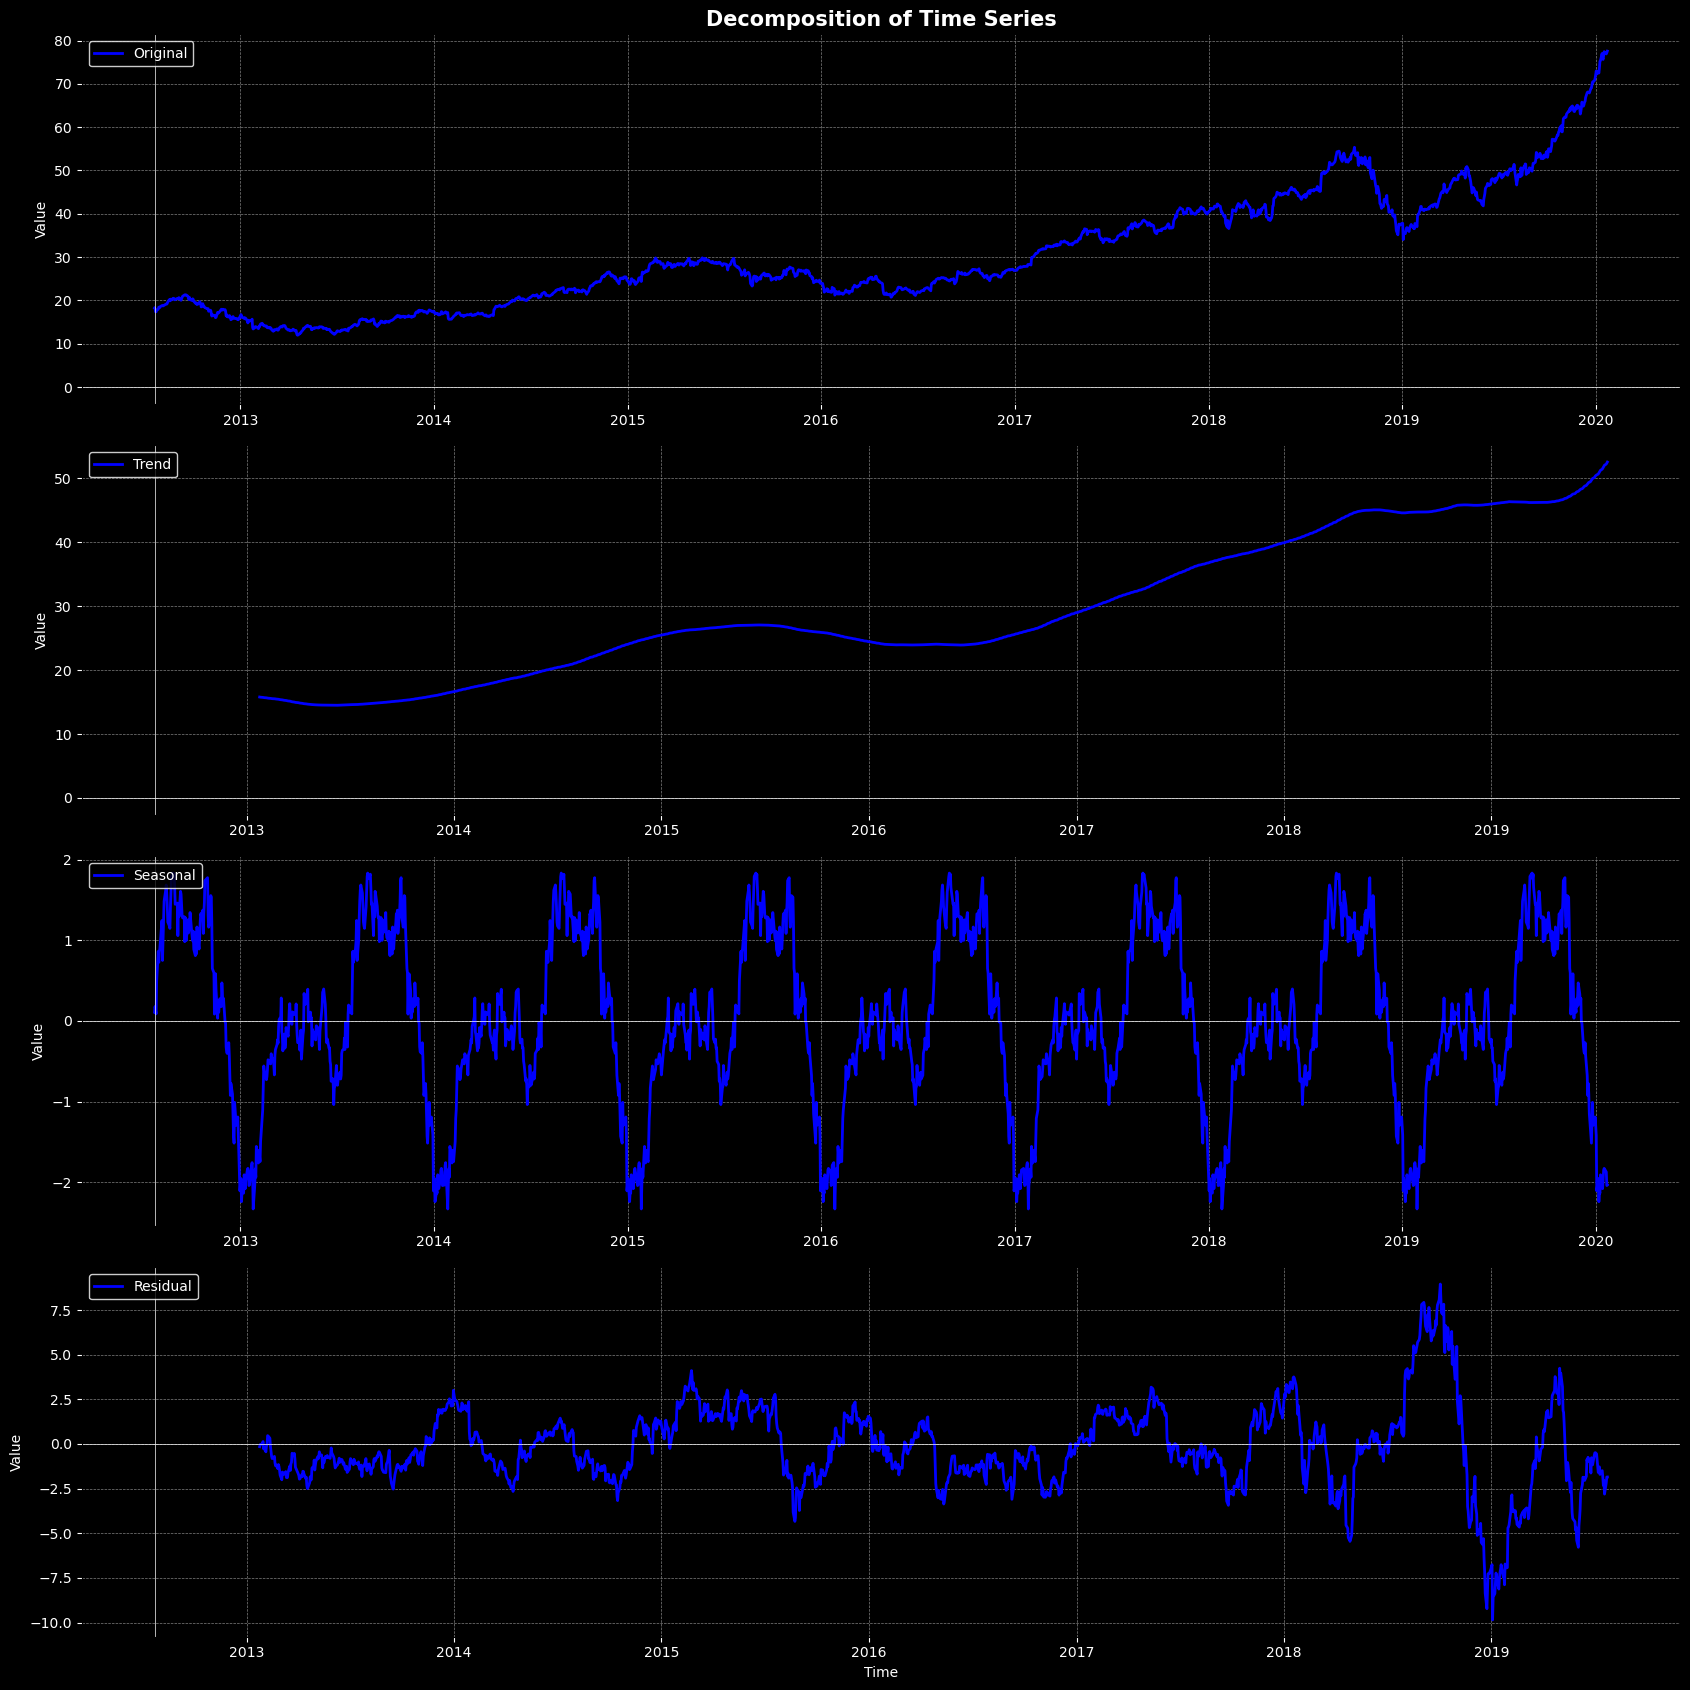

In [14]:
#Additive time series:
#Value = Base Level + Trend + Seasonality + Error
#Multiplicative Time Series:
#Value = Base Level x Trend x Seasonality x Error

decomposed = seasonal_decompose(adj_close,  
                                model ='Additive', period=252)

#Extract and plot trend, seasonal and residuals. 
trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid


# Create a figure with a black background and specific size
fig = plt.figure(figsize=(17, 17), facecolor='black')

# Subplot 1: Original
ax1 = fig.add_subplot(411, facecolor='black')
ax1.plot(adj_close, label='Original', color='blue', linewidth = 2)
ax1.axhline(0, color='white', linewidth=0.5)
ax1.axvline(adj_close.index[0], color='white', linewidth=0.5)
ax1.set_title('Decomposition of Time Series', fontsize=15, color='white', fontweight='bold')
ax1.set_ylabel('Value', color='white')
ax1.tick_params(axis='both', colors='white')
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')

# Subplot 2: Trend
ax2 = fig.add_subplot(412, facecolor='black')
ax2.plot(trend, label='Trend', color='blue', linewidth = 2)
ax2.axhline(0, color='white', linewidth=0.5)
ax2.axvline(trend.index[0], color='white', linewidth=0.5)
ax2.set_ylabel('Value', color='white')
ax2.tick_params(axis='both', colors='white')
ax2.grid(color='gray', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')

# Subplot 3: Seasonal
ax3 = fig.add_subplot(413, facecolor='black')
ax3.plot(seasonal, label='Seasonal', color='blue', linewidth = 2)
ax3.axhline(0, color='white', linewidth=0.5)
ax3.axvline(seasonal.index[0], color='white', linewidth=0.5)
ax3.set_ylabel('Value', color='white')
ax3.tick_params(axis='both', colors='white')
ax3.grid(color='gray', linestyle='--', linewidth=0.5)
ax3.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')

# Subplot 4: Residual
ax4 = fig.add_subplot(414, facecolor='black')
ax4.plot(residual, label='Residual', color='blue', linewidth = 2)
ax4.axhline(0, color='white', linewidth=0.5)
ax4.axvline(residual.index[0], color='white', linewidth=0.5)
ax4.set_xlabel('Time', color='white')
ax4.set_ylabel('Value', color='white')
ax4.tick_params(axis='both', colors='white')
ax4.grid(color='gray', linestyle='--', linewidth=0.5)
ax4.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Moving Average (MA) Process

In [97]:
def generate_ma(q, theta, n_samples=150, mu=0, sigma=1, seed=None):
    """
    Generate an MA(q) process.
    
    Parameters:
    q (int): The order of the MA process
    theta (list or np.array): The coefficients of the MA process
    n_samples (int): The number of samples to generate
    mu (float): The mean of the process
    seed (int): Random seed for reproducibility
    
    Returns:
    np.array: The generated MA(q) process
    """
    if seed is not None:
        np.random.seed(seed)
    
    epsilon = np.random.normal(0, sigma, n_samples)
    X = np.zeros_like(epsilon)
    
    for t in range(n_samples):
        X[t] = mu + epsilon[t]
        for j in range(1, min(q+1, t+1)):
            X[t] += theta[j-1] * epsilon[t-j]
    
    return X

# Generate different MA processes
ma_processes = [
    ("MA(1)", [0.5]),
    ("MA(2)", [0.5, 0.2]),
    ("MA(3)", [0.5, 0.2, -0.3]),
    ("MA(5)", [0.5, 1, 3, 2, 0.1])
]

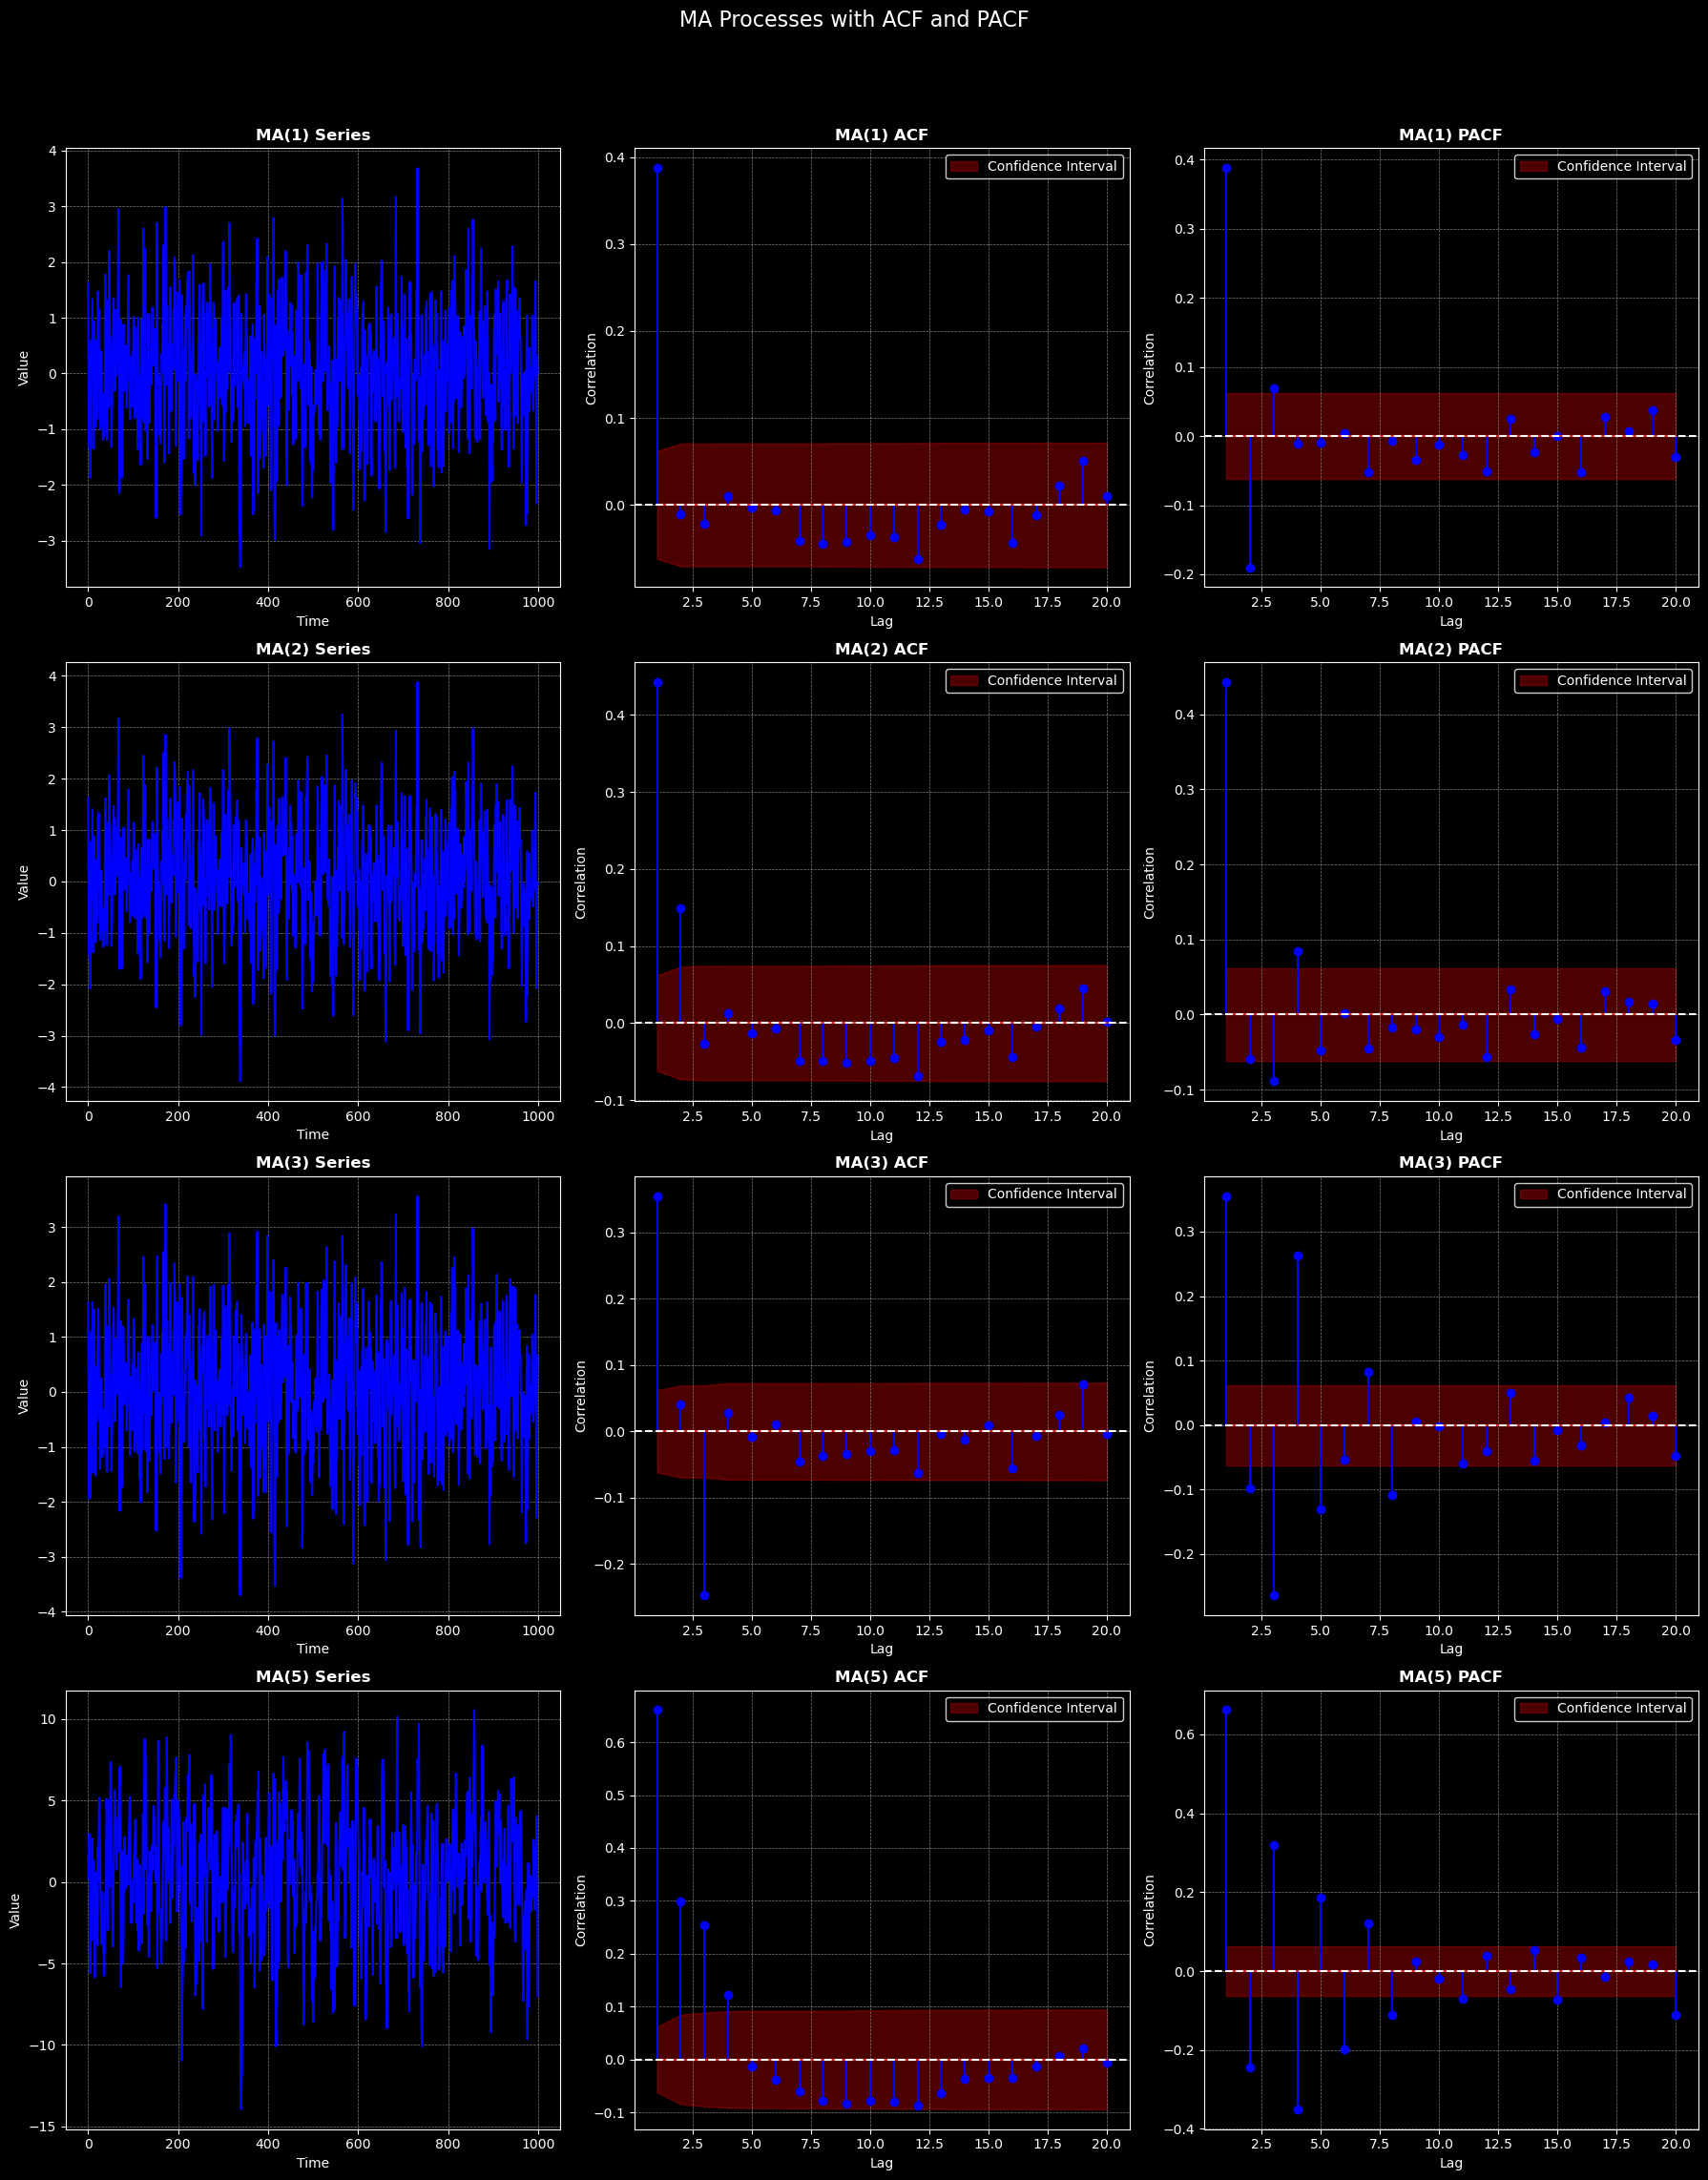

In [98]:
lags = 20
# Plot the MA processes and their ACF/PACF
fig, axes = plt.subplots(4, 3, figsize=(18, 24))
fig.patch.set_facecolor('black')
fig.suptitle('MA Processes with ACF and PACF', fontsize=16, color='white')

for idx, (title, theta) in enumerate(ma_processes):
    X = generate_ma(len(theta), theta, n_samples=1000, seed=1)
    
    # Plot the series
    axes[idx, 0].plot(X, color='blue')
    axes[idx, 0].set_facecolor('black')
    axes[idx, 0].set_title(f"{title} Series", color='white', fontsize=12, fontweight='bold')
    axes[idx, 0].set_xlabel('Time', color='white')
    axes[idx, 0].set_ylabel('Value', color='white')
    axes[idx, 0].tick_params(axis='both', colors='white')
    axes[idx, 0].grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Plot ACF
    acf_values, acf_conf_int = acf(X, nlags=lags, alpha=0.05)
    axes[idx, 1].set_facecolor('black')
    axes[idx, 1].stem(range(1, len(acf_values)), acf_values[1:], linefmt='blue')
    axes[idx, 1].axhline(y=0, color='white', linestyle='--')
    axes[idx, 1].fill_between(range(1, len(acf_values)), 
                              acf_conf_int[1:, 0] - acf_values[1:], 
                              acf_conf_int[1:, 1] - acf_values[1:], 
                              alpha=0.3, color='red', label = "Confidence Interval")
    axes[idx, 1].set_title(f"{title} ACF", color='white', fontsize=12, fontweight='bold')
    axes[idx, 1].set_xlabel('Lag', color='white')
    axes[idx, 1].set_ylabel('Correlation', color='white')
    axes[idx, 1].tick_params(axis='both', colors='white')
    axes[idx, 1].legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')
    axes[idx, 1].grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Plot PACF
    pacf_values, pacf_conf_int = pacf(X, nlags=lags, alpha=0.05)
    axes[idx, 2].set_facecolor('black')
    axes[idx, 2].stem(range(1, len(pacf_values)), pacf_values[1:], linefmt='blue')
    axes[idx, 2].axhline(y=0, color='white', linestyle='--')
    axes[idx, 2].fill_between(range(1, len(pacf_values)), 
                              pacf_conf_int[1:, 0] - pacf_values[1:], 
                              pacf_conf_int[1:, 1] - pacf_values[1:], 
                              alpha=0.3, color='red', label = "Confidence Interval")
    axes[idx, 2].set_title(f"{title} PACF", color='white', fontsize=12, fontweight='bold')
    axes[idx, 2].set_xlabel('Lag', color='white')
    axes[idx, 2].set_ylabel('Correlation', color='white')
    axes[idx, 2].tick_params(axis='both', colors='white')
    axes[idx, 2].legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')
    axes[idx, 2].grid(color='gray', linestyle='--', linewidth=0.5)

    for ax in axes[idx, :]:
        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.spines['right'].set_color('white')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# AutoRegressive (AR) Process

In [95]:
def generate_ar(p, phi, n_samples=150, mu=0, sigma=1, seed=None):
    """
    Generate an AR(p) process.
    
    Parameters:
    p (int): The order of the AR process
    phi (list or np.array): The coefficients of the AR process
    n_samples (int): The number of samples to generate
    mu (float): The mean of the process
    sigma (float): The standard deviation of the white noise
    seed (int): Random seed for reproducibility
    
    Returns:
    np.array: The generated AR(p) process
    """
    if seed is not None:
        np.random.seed(seed)
    
    X = np.zeros(n_samples)
    epsilon = np.random.normal(0, sigma, n_samples)
    
    # Initialize first p values with the mean
    X[:p] = mu
    
    # Generate the rest of the series
    for t in range(p, n_samples):
        X[t] = mu + epsilon[t]
        for j in range(1, p+1):
            X[t] += phi[j-1] * (X[t-j] - mu)
    
    return X

# Generate different AR processes
ar_processes = [
    ("AR(1)", [0.7]),
    ("AR(2)", [0.5, -0.3]),
    ("AR(3)", [0.4, -0.2, 0.1]),
    ("AR(5)", [0.5, -0.4, 0.3, -0.2, 0.1])
]

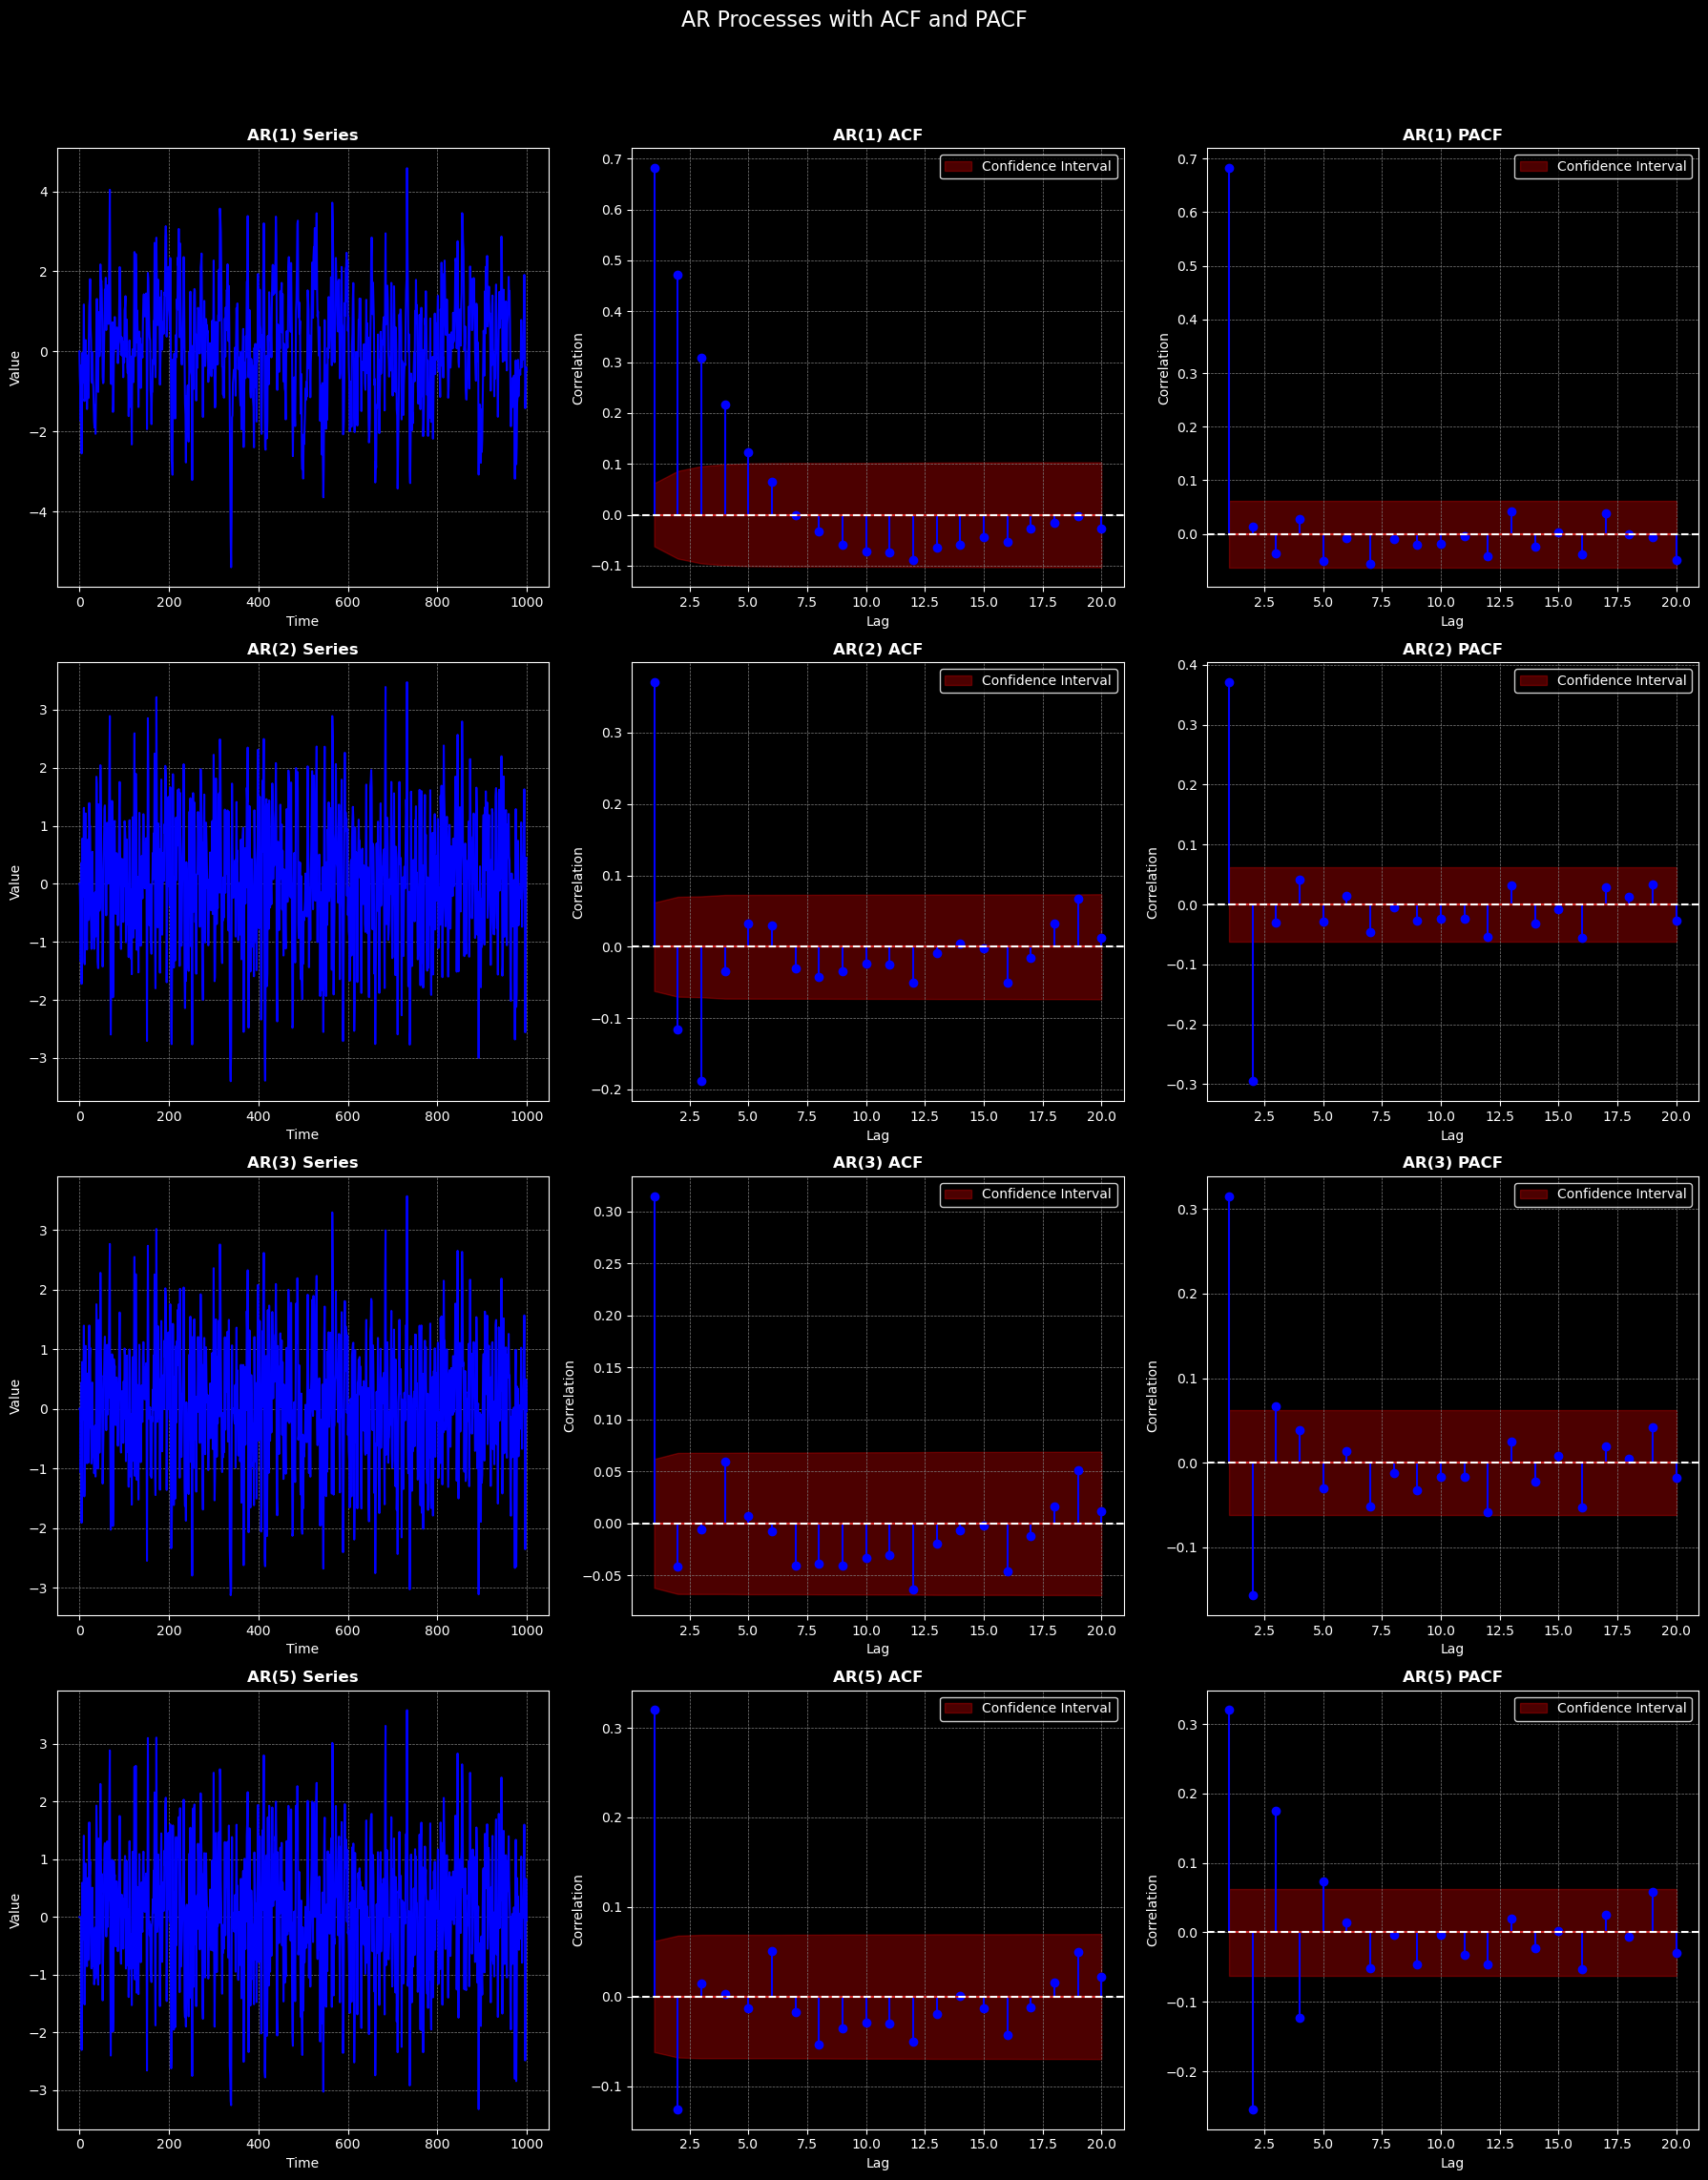

In [96]:
lags = 20
# Plot the AR processes and their ACF/PACF
fig, axes = plt.subplots(4, 3, figsize=(18, 24))
fig.patch.set_facecolor('black')
fig.suptitle('AR Processes with ACF and PACF', fontsize=16, color='white')

for idx, (title, phi) in enumerate(ar_processes):
    X = generate_ar(len(phi), phi, n_samples=1000, seed=1)
    
    # Plot the series
    axes[idx, 0].plot(X, color='blue')
    axes[idx, 0].set_facecolor('black')
    axes[idx, 0].set_title(f"{title} Series", color='white', fontsize=12, fontweight='bold')
    axes[idx, 0].set_xlabel('Time', color='white')
    axes[idx, 0].set_ylabel('Value', color='white')
    axes[idx, 0].tick_params(axis='both', colors='white')
    axes[idx, 0].grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Plot ACF
    acf_values, acf_conf_int = acf(X, nlags=lags, alpha=0.05)
    axes[idx, 1].set_facecolor('black')
    axes[idx, 1].stem(range(1, len(acf_values)), acf_values[1:], linefmt='blue')
    axes[idx, 1].axhline(y=0, color='white', linestyle='--')
    axes[idx, 1].fill_between(range(1, len(acf_values)), 
                              acf_conf_int[1:, 0] - acf_values[1:], 
                              acf_conf_int[1:, 1] - acf_values[1:], 
                              alpha=0.3, color='red', label = "Confidence Interval")
    axes[idx, 1].set_title(f"{title} ACF", color='white', fontsize=12, fontweight='bold')
    axes[idx, 1].set_xlabel('Lag', color='white')
    axes[idx, 1].set_ylabel('Correlation', color='white')
    axes[idx, 1].tick_params(axis='both', colors='white')
    axes[idx, 1].legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')
    axes[idx, 1].grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Plot PACF
    pacf_values, pacf_conf_int = pacf(X, nlags=lags, alpha=0.05)
    axes[idx, 2].set_facecolor('black')
    axes[idx, 2].stem(range(1, len(pacf_values)), pacf_values[1:], linefmt='blue')
    axes[idx, 2].axhline(y=0, color='white', linestyle='--')
    axes[idx, 2].fill_between(range(1, len(pacf_values)), 
                              pacf_conf_int[1:, 0] - pacf_values[1:], 
                              pacf_conf_int[1:, 1] - pacf_values[1:], 
                              alpha=0.3, color='red', label = "Confidence Interval")
    axes[idx, 2].set_title(f"{title} PACF", color='white', fontsize=12, fontweight='bold')
    axes[idx, 2].set_xlabel('Lag', color='white')
    axes[idx, 2].set_ylabel('Correlation', color='white')
    axes[idx, 2].tick_params(axis='both', colors='white')
    axes[idx, 2].legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')
    axes[idx, 2].grid(color='gray', linestyle='--', linewidth=0.5)

    for ax in axes[idx, :]:
        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.spines['right'].set_color('white')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# AutoRegressive Integrated Moving Average (ARIMA) Process

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [28]:
# Generate some sample data
np.random.seed(1)
dates = pd.DatetimeIndex(pd.date_range(start='1/1/2000', periods=150))
y = pd.Series(np.cumsum(np.random.randn(150)), index=dates)

In [30]:
# MA Model (using ARIMA(0,0,1))
model_ma = ARIMA(y, order=(0,0,1))
results_ma = model_ma.fit()
print(results_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3274.390
Date:                Thu, 18 Jul 2024   AIC                           6554.780
Time:                        10:02:27   BIC                           6569.503
Sample:                    01-01-2000   HQIC                          6560.376
                         - 09-26-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.5080      0.442     55.450      0.000      23.642      25.374
ma.L1          0.9484      0.012     78.042      0.000       0.925       0.972
sigma2        40.7970      2.167     18.827      0.0

In [29]:
# AR Model
model_ar = AutoReg(y, lags=5)
results_ar = model_ar.fit()
print(results_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(5)   Log Likelihood               -1388.852
Method:               Conditional MLE   S.D. of innovations              0.977
Date:                Thu, 18 Jul 2024   AIC                           2791.703
Time:                        10:02:25   BIC                           2826.022
Sample:                    01-06-2000   HQIC                          2804.750
                         - 09-26-2002                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1547      0.071      2.187      0.029       0.016       0.293
y.L1           0.9709      0.032     30.655      0.000       0.909       1.033
y.L2           0.0427      0.044      0.969      0.3

In [31]:
# ARIMA Model
model_arima = ARIMA(y, order=(1,1,1))
results_arima = model_arima.fit()
print(results_arima.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1396.510
Date:                Thu, 18 Jul 2024   AIC                           2799.020
Time:                        10:02:27   BIC                           2813.740
Sample:                    01-01-2000   HQIC                          2804.615
                         - 09-26-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7845      0.220     -3.566      0.000      -1.216      -0.353
ma.L1          0.7476      0.237      3.161      0.002       0.284       1.211
sigma2         0.9588      0.041     23.636      0.0

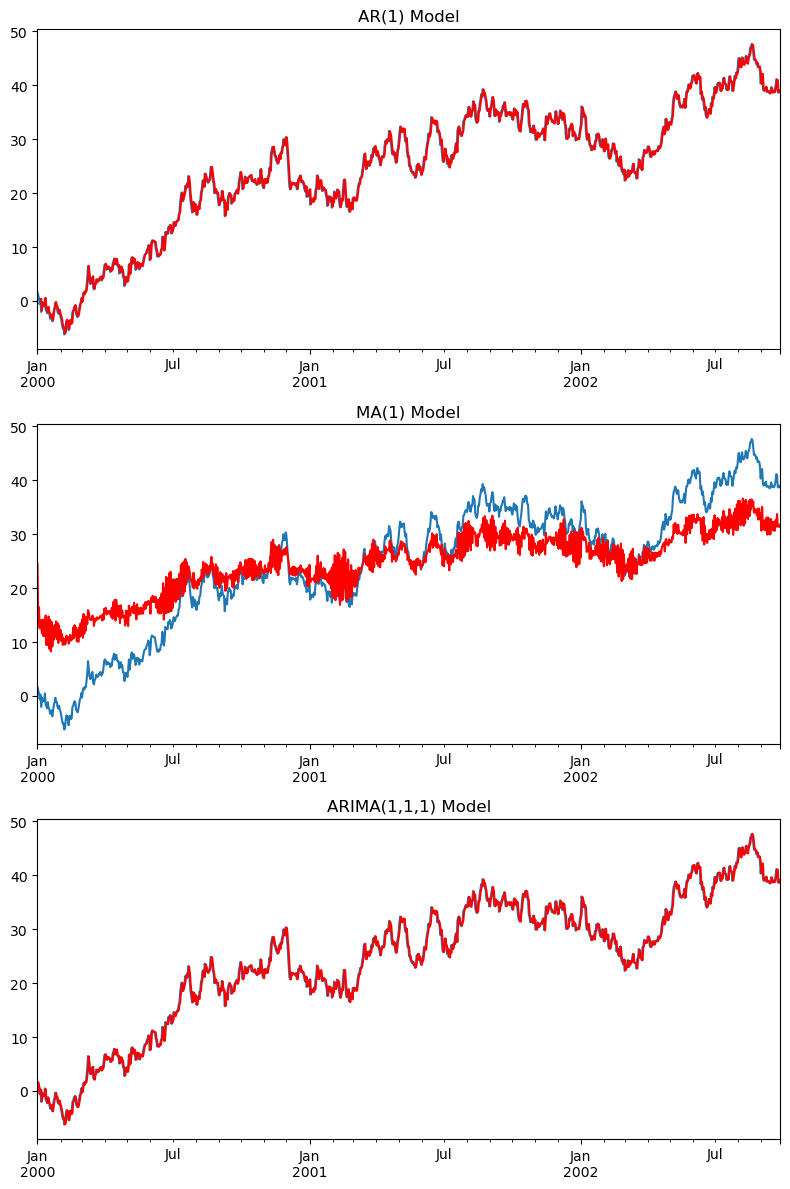

In [32]:
# Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

y.plot(ax=ax1)
ax1.plot(results_ar.fittedvalues, color='red')
ax1.set_title('AR(1) Model')

y.plot(ax=ax2)
ax2.plot(results_ma.fittedvalues, color='red')
ax2.set_title('MA(1) Model')

y.plot(ax=ax3)
ax3.plot(results_arima.fittedvalues, color='red')
ax3.set_title('ARIMA(1,1,1) Model')

plt.tight_layout()
plt.show()

In [21]:
# Forecast
forecast_ar = results_ar.forecast(steps=10)
forecast_ma = results_ma.forecast(steps=10)
forecast_arima = results_arima.forecast(steps=10)

print("AR Forecast:", forecast_ar)
print("MA Forecast:", forecast_ma)
print("ARIMA Forecast:", forecast_arima)

AR Forecast: 2000-04-10    5.997352
2000-04-11    5.937521
2000-04-12    5.878773
2000-04-13    5.821088
2000-04-14    5.764447
2000-04-15    5.708831
2000-04-16    5.654221
2000-04-17    5.600600
2000-04-18    5.547949
2000-04-19    5.496251
Freq: D, dtype: float64
MA Forecast: 2000-04-10    3.310917
2000-04-11    0.323506
2000-04-12    0.323506
2000-04-13    0.323506
2000-04-14    0.323506
2000-04-15    0.323506
2000-04-16    0.323506
2000-04-17    0.323506
2000-04-18    0.323506
2000-04-19    0.323506
Freq: D, Name: predicted_mean, dtype: float64
ARIMA Forecast: 2000-04-10    5.959763
2000-04-11    6.052733
2000-04-12    5.965002
2000-04-13    6.047789
2000-04-14    5.969667
2000-04-15    6.043387
2000-04-16    5.973822
2000-04-17    6.039466
2000-04-18    5.977521
2000-04-19    6.035976
Freq: D, Name: predicted_mean, dtype: float64


## AutoRegressive Integrated Moving Average (ARIMA)

In [ ]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
# p, d, q represent non-seasonal components
# P, D, Q represent seasonal components

arima_model = auto_arima(adj_close, start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=30)           
  
# To print the summary 
print(arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=1.78 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5095.363, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4271.215, Time=0.89 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5089.656, Time=0.25 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3973.542, Time=1.72 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=3765.697, Time=3.20 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=3678.593, Time=8.05 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=3596.707, Time=10.89 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=62.92 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=30.46 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=3597.333, Time=13.30 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=3592.611, Time=17.18 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=3673.312, Time=7.99 sec


In [16]:
#Split data into train and test
size = int(len(adj_close) * 0.66)
X_train, X_test = adj_close[0:size], adj_close[size:len(adj_close)]

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create the SARIMAX(0, 1, 1)x(5, 1, [], 12) Model
model = SARIMAX(X_train,
                order=(0, 1, 1),
                seasonal_order=(5, 1, 0, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

result = model.fit() 
print(result.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                           Adj Close   No. Observations:                 1809
Model:             SARIMAX(0, 1, 1)x(5, 1, [], 12)   Log Likelihood                -415.466
Date:                             Sat, 29 Jun 2024   AIC                            844.932
Time:                                     17:56:45   BIC                            883.148
Sample:                                 07-23-2012   HQIC                           859.065
                                      - 07-05-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0086      0.019      0.448      0.654      -0.029       0.046
ar.S.L12      -0.8321      

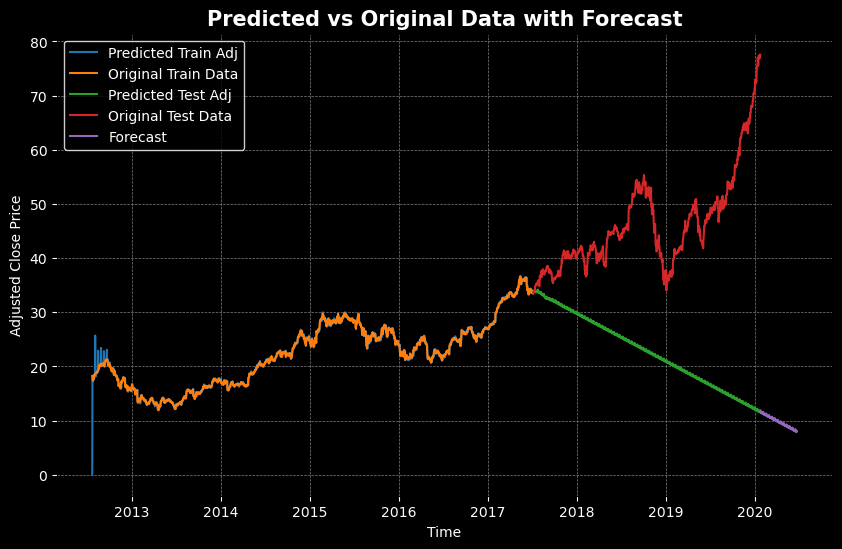

In [23]:
# Train prediction
train_prediction = result.predict(X_train.index[0], X_train.index[-1]).rename('Predicted Train Adj') 

# Test Prediction
test_prediction = result.predict(X_test.index[0], X_test.index[-1]).rename('Predicted Test Adj') 

# Forecast
forecast = result.predict(start = len(adj_close),  
                          end = (len(adj_close)-1) + 1 * 150,  # 150 days into the future
                         ).rename('Forecast') 
  
# Create a figure with a black background
fig, ax = plt.subplots(figsize=(10, 6), facecolor='black')
ax.set_facecolor('black')

# Plot the predicted and original  data
ax.plot(train_prediction, label='Predicted Train Adj')
ax.plot(X_train, label='Original Train Data')
ax.plot(test_prediction, label='Predicted Test Adj')
ax.plot(X_test, label='Original Test Data')
ax.plot(forecast, label='Forecast')


# Set axis labels and title with white color
ax.set_xlabel('Time', color='white')
ax.set_ylabel('Adjusted Close Price', color='white')
ax.set_title('Predicted vs Original Data with Forecast', fontsize=15, color='white', fontweight='bold')

# Customize grid and ticks
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')

# Add legend with white font color
ax.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')

# Display the plot
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(X_train, train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(X_test, test_prediction))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.57 RMSE
Test Score: 27.67 RMSE


**Overfitting!!!**